In [1]:
# import dependacies

import numpy
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
# define two functions for calculating some measurments
# the calcuated measurements might not make sense, but are here only for demonstrational purposes

def efficacy_over_price(efficacy, price):
    return ( efficacy / price ) * 100

def efficacy_and_power_over_price(efficacy, price, nom_lamp_power):
    return ( (efficacy * nom_lamp_power  ) / (price) ) * 10

In [3]:
# Read the CSV file with Pandas Data Frame

data_frame=pd.read_csv("random_lamp_data.csv",parse_dates=['Brand'])

# append two calculated columns to the Pandas Data Frame using, the defined functions from above

data_frame['efficacy_over_price'] = efficacy_over_price(
    data_frame['avg_meas_efficacy'], 
    data_frame['Price']
)

data_frame['efficacy_and_power_over_price'] = efficacy_and_power_over_price(
    data_frame['avg_meas_efficacy'], 
    data_frame['Price'],
    data_frame['nom_lamp_power']
)

In [4]:
# just prining out the first 5 rows in the file
data_frame.head(5)



,Submit_ID,Brand,Model_No,Family Name,SoldIn,Country,Sing_or_fam,nom_lamp_power,avg_meas_lum_flux,median_lamp_life,...,Product Class,Availability Status,Product Website,Representative Brand URL,Lamp Light Output (Lumens),Lamp Type,What test standard was used,Price,efficacy_over_price,efficacy_and_power_over_price
0,70832,Sylvania,MR16 35W,MR16 35W,"Australia,Fiji,New Zealand",China,NaN,35.0,485.6,4002,...,NaN,Unavailable,NaN,http://www.sla.net.au,480.0,ELV halogen reflector,AS/NZS 4934.1:2008,102,13.529412,47.352941
1,77022,OSRAM,45860 SP 20W LL,Decostar 51 Long Life 20W,"Australia,Fiji,New Zealand",Germany,Family,20.0,221.0,4322,...,Class 1,Available,http://www.ledvance.com.au,http://www.ledvance.com.au,221.0,ELV halogen reflector,AS/NZS 4934.1:2008,147,7.591837,15.183673
2,77022,OSRAM,45860 WFL 20W LL,Decostar 51 Long Life 20W,"Australia,Fiji,New Zealand",Germany,Family,20.0,221.0,4322,...,Class 1,Available,http://www.ledvance.com.au,http://www.ledvance.com.au,221.0,ELV halogen reflector,AS/NZS 4934.1:2008,124,9.000000,18.000000
3,77022,OSRAM,Decostar 51 Long Life 20W,Decostar 51 Long Life 20W,"Australia,Fiji,New Zealand",Germany,Family,20.0,221.0,4322,...,Class 1,Available,http://www.ledvance.com.au,http://www.ledvance.com.au,221.0,ELV halogen reflector,AS/NZS 4934.1:2008,108,10.333333,20.666667
4,77959,SEARCHLIGHT,G4 12V 10W,G4 12V 10W,"Australia,Fiji,New Zealand",China,NaN,10.0,132.1,2000,...,NaN,Unavailable,NaN,NaN,130.0,ELV halogen non reflector,AS/NZS 4934.1:2008,110,11.090909,11.090909


In [5]:
# construct a partia data frame, that will contain only the rows for the OSRAM manufacturer
partial_data_frame = data_frame[ data_frame['Brand'] == 'OSRAM' ]

# print out statistics for efficay of OSRAM lamps
# the .describe() function is executed on the partial_data_frame variable, that contains only OSRAM rows
print ('OSRAM efficacy stats:')
print( partial_data_frame['avg_meas_efficacy'].describe())
print('')

# do the same thing for PHILIPS
partial_data_frame = data_frame[ data_frame['Brand'] == 'PHILIPS' ]
print ('PHILIPS efficacy stats:')
print (partial_data_frame['avg_meas_efficacy'].describe())



OSRAM efficacy stats:
count     7.000000
mean     12.597143
std       1.510560
min      11.160000
25%      11.160000
50%      12.600000
75%      13.800000
max      14.500000
Name: avg_meas_efficacy, dtype: float64

PHILIPS efficacy stats:
count    10.000000
mean     14.040000
std       0.484883
min      13.580000
25%      13.580000
50%      14.040000
75%      14.500000
max      14.500000
Name: avg_meas_efficacy, dtype: float64


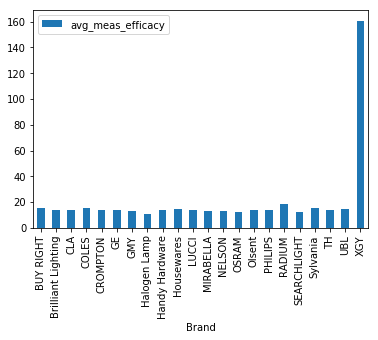

In [6]:
# construct a partial data frame that has only the Brand and Efficacy columns for all rows in the frame
partial_data_frame = data_frame[['Brand','avg_meas_efficacy']]

# Group by the values of the selected columns of the frame, based on the Brand column
brands = partial_data_frame.groupby('Brand')

# calculate the mean efficay by brand 
brand_totals = brands.mean()

# plot it on a bar chart
my_plot = brand_totals.plot(kind='bar')




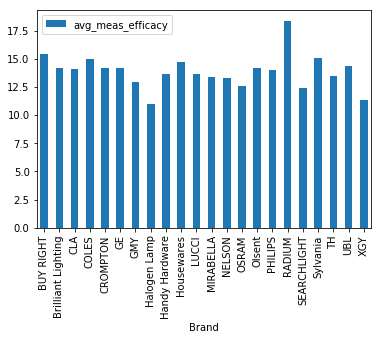

In [7]:
# notice how the XGY bar is way above all other. 
# You will see in the CSV rows 175 to 179 are the outliers that make the XGY bar go up
# I don't know the reason for this, but for demo purposes it is good to see that we can remove them

# construct a partial data frame
df = data_frame[['Brand','avg_meas_efficacy']]

# clean the data frame from outliers that are 3 standard deviations away from the mean
# answer copeid from here: https://stackoverflow.com/a/23200666/855475
clened_data_frame = df[ numpy.abs(df.avg_meas_efficacy-df.avg_meas_efficacy.mean()) <= (3*df.avg_meas_efficacy.std())  ]

# plot based on the clened_data_frame
brands = clened_data_frame.groupby('Brand')
brand_totals = brands.mean()
my_plot = brand_totals.plot(kind='bar')


,efficacy_over_price,efficacy_and_power_over_price,avg_meas_efficacy,Price
Brand,,,,
PHILIPS,11.008328,52.425887,14.040,129.200
RADIUM,14.461457,50.615098,18.375,127.125


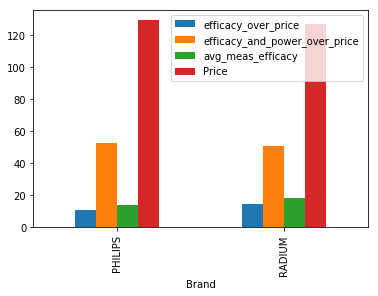

In [8]:
# select only desired columns in the partial data frame
partial_data_frame = data_frame[
    ['Brand','efficacy_over_price','efficacy_and_power_over_price', 'avg_meas_efficacy','Price']
]

# filter the data frame based on Brand. We want only the PHILIPS and RADIUM brands
partial_data_frame = partial_data_frame[partial_data_frame['Brand'].isin(['PHILIPS','RADIUM'])]

# get the average of all columns, grouped by brand
brand_averages = partial_data_frame.groupby('Brand').mean()

# plot the averages
my_plot = brand_averages.plot(kind='bar')

# print the averages as a table
brand_averages.head()

